# Create Mask for masking out gradients in the Voxel Object during ReconOpt

In [2]:
import os
import sys
notebook_dir = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(notebook_dir, '..')))

import torch
import matplotlib.pyplot as plt
from Misc.slice_visualizer import Slice_Visualizer

### Mask creation functions

In [3]:
def sphere_mask(shape, center, radius):
    Z, Y, X = torch.meshgrid(torch.arange(shape[0]), torch.arange(shape[1]), torch.arange(shape[2]), indexing='ij')
    dist_from_center = torch.sqrt((X - center[2])**2 + (Y - center[1])**2 + (Z - center[0])**2)
    mask = (dist_from_center <= radius).float()
    return mask

def elipsoid_mask(shape, center, axes):
    Z, Y, X = torch.meshgrid(torch.arange(shape[0]), torch.arange(shape[1]), torch.arange(shape[2]), indexing='ij')
    dist_from_center = ((X - center[2])**2 / axes[2]**2) + ((Y - center[1])**2 / axes[1]**2) + ((Z - center[0])**2 / axes[0]**2)
    mask = (dist_from_center <= 1).float()
    return mask


## Raw Coded WFS

In [8]:
### Load Voxel Object ###

voxel_object_file = "../../Data/Voxel Data/HEK Cells/Raw_Coded_WFS_Tomog.pt"
data = torch.load(voxel_object_file, weights_only=True)

voxel_object = data["data"]
voxel_object = torch.flip(voxel_object, dims=[2])

In [ ]:
### Mask Creation ###
mask = elipsoid_mask(voxel_object.shape, center=(125,125,125), axes=(93, 83, 83))

### Save Mask ###
mask_path = "../../Data/Mask Data/HEK Cells/Raw_Coded_WFS_Mask.pt"

data = {"mask": mask}

#torch.save(data, mask_path)

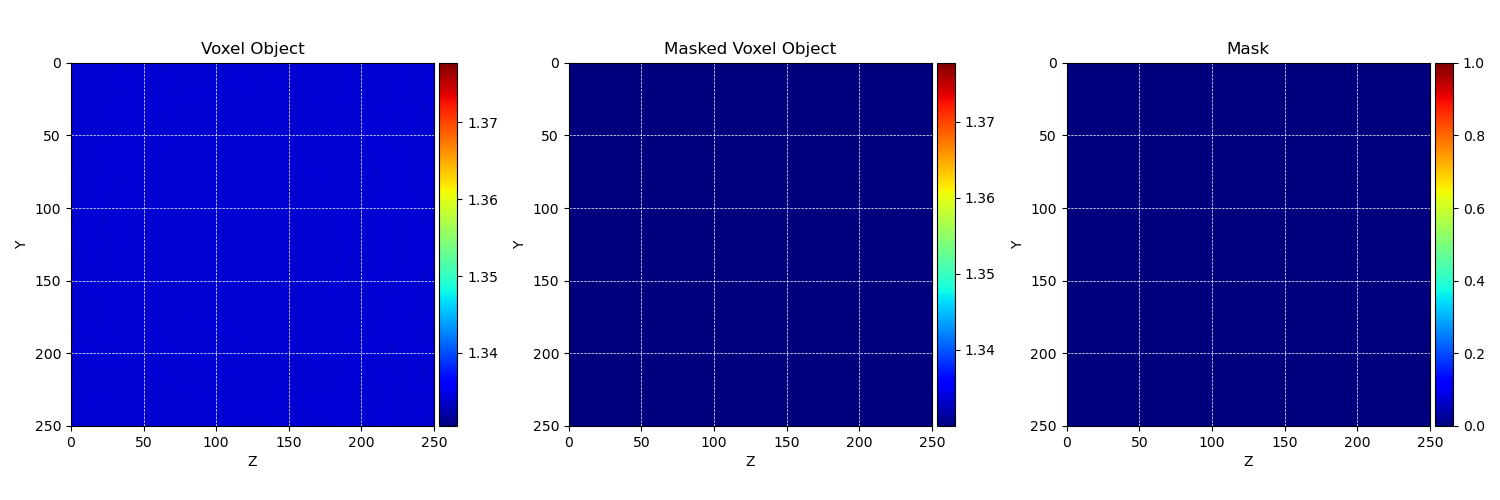

In [10]:
### Visualize Mask ###

# Apply Mask
masked_voxel_object = voxel_object * mask
# Lower contrast agent values to 1.334 where there is no object (0)
masked_voxel_object = torch.where(masked_voxel_object == 0, torch.tensor(1.33), masked_voxel_object)

# Convert to numpy for visualization
voxel_object_np = voxel_object.numpy()
mask_np = mask.numpy()
masked_voxel_object_np = masked_voxel_object.numpy()

vis_data = [voxel_object_np, masked_voxel_object_np,  mask_np] 
titles = ["Voxel Object","Masked Voxel Object", "Mask"]


%matplotlib widget
plt.close('all')
visualizer = Slice_Visualizer()
visualizer.show(vis_data, titles=titles, ncols=3, grid=True, axis="x", slice_idx=0, color_range="Volume", share_cbars="Local", cmap="jet")

## DHM

In [4]:
voxel_object_file = "../../Data/Voxel Data/HEK Cells/DHM_Tomog.pt"
data = torch.load(voxel_object_file, weights_only=True)

voxel_object = data["data"]
voxel_object = torch.flip(voxel_object, dims=[2])

In [5]:
### Mask Creation ###
mask = elipsoid_mask(voxel_object.shape, center=(125,120,125), axes=(103, 98, 95))

### Save Mask ###
mask_path = "../../Data/Mask Data/HEK Cells/DHM_Mask.pt"

data = {"mask": mask}

#torch.save(data, mask_path)

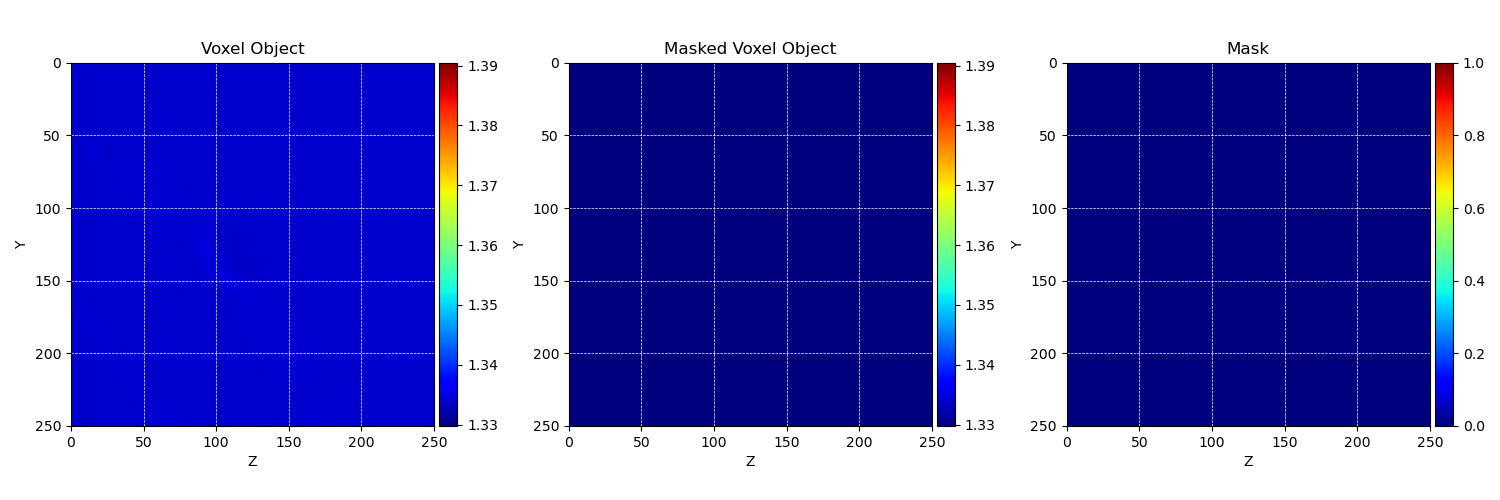

In [6]:
### Visualize Mask ###

# Apply Mask
masked_voxel_object = voxel_object * mask
# Lower contrast agent values to 1.334 where there is no object (0)
masked_voxel_object = torch.where(masked_voxel_object == 0, torch.tensor(1.33), masked_voxel_object)

# Convert to numpy for visualization
voxel_object_np = voxel_object.numpy()
mask_np = mask.numpy()
masked_voxel_object_np = masked_voxel_object.numpy()

vis_data = [voxel_object_np, masked_voxel_object_np,  mask_np] 
titles = ["Voxel Object","Masked Voxel Object", "Mask"]


%matplotlib widget
plt.close('all')
visualizer = Slice_Visualizer()
visualizer.show(vis_data, titles=titles, ncols=3, grid=True, axis="x", slice_idx=0, color_range="Volume", share_cbars="Local", cmap="jet")

## To small debugging Mask

In [14]:
voxel_object_file = "../../Data/Voxel Data/HEK Cells/DHM_Tomog.pt"
data = torch.load(voxel_object_file, weights_only=True)

voxel_object = data["data"]
voxel_object = torch.flip(voxel_object, dims=[2])

In [15]:
### Mask Creation ###
mask = elipsoid_mask(voxel_object.shape, center=(125,120,125), axes=(60, 40, 50))

### Save Mask ###
mask_path = "../../Data/Mask Data/HEK Cells/DHM_Debug_Mask.pt"

data = {"mask": mask}

torch.save(data, mask_path)

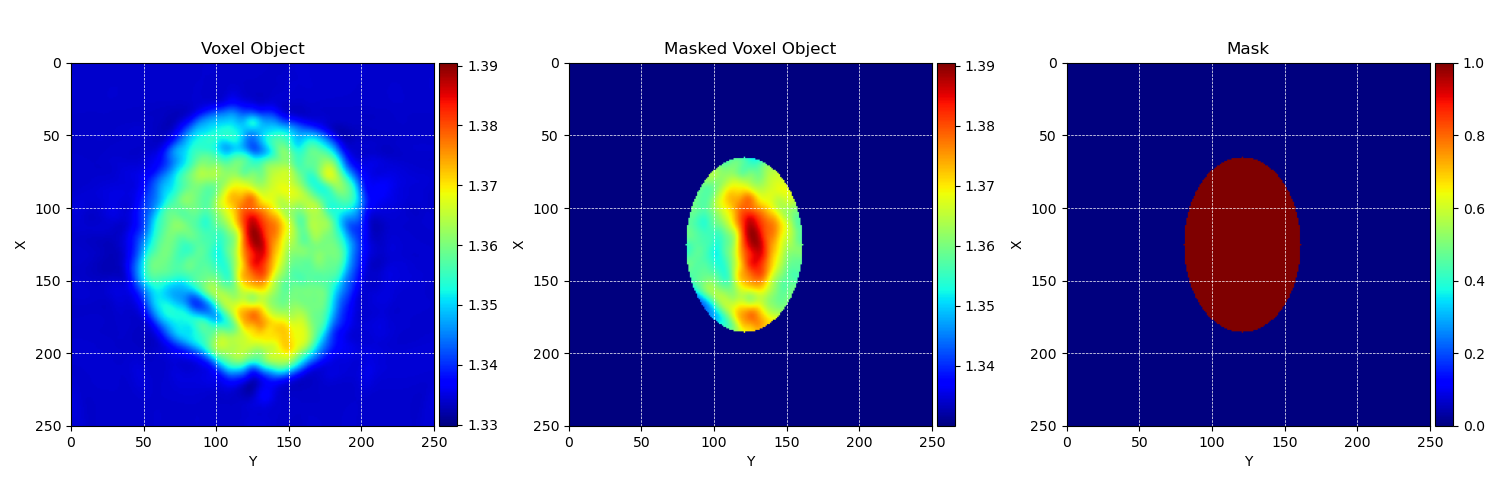

In [16]:
### Visualize Mask ###

# Apply Mask
masked_voxel_object = voxel_object * mask
# Lower contrast agent values to 1.334 where there is no object (0)
masked_voxel_object = torch.where(masked_voxel_object == 0, torch.tensor(1.33), masked_voxel_object)

# Convert to numpy for visualization
voxel_object_np = voxel_object.numpy()
mask_np = mask.numpy()
masked_voxel_object_np = masked_voxel_object.numpy()

vis_data = [voxel_object_np, masked_voxel_object_np,  mask_np] 
titles = ["Voxel Object","Masked Voxel Object", "Mask"]


%matplotlib widget
plt.close('all')
visualizer = Slice_Visualizer()
visualizer.show(vis_data, titles=titles, ncols=3, grid=True, axis="z", slice_idx=125, color_range="Volume", share_cbars="Local", cmap="jet")